<a href="https://colab.research.google.com/github/nhuynguyenthi/DoAnCN1_CNN/blob/master/Test_Thi_Giac_May_Tinh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Thư viện**

In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
# connect drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Xử lý ảnh trong tập Test**

In [ ]:
# Load test set
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_vegetables/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


# **Loading Model**

In [ ]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/Models/trained_model.h5')

# **Dự đoán **

# **Đánh giá mô hình phân loại hình ảnh**

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

# Load the test set
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_vegetables/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

y_true = []
y_pred = []

# Đưa ra dự đoán trên tập kiểm tra
for images, labels in test_set:
    preds = cnn.predict(images) # dự đoán nhãn cho ảnh
    y_true.extend(np.argmax(labels, axis=1)) # lấy nhãn thật từ one-hot
    y_pred.extend(np.argmax(preds, axis=1))

# Lấy tên lớp
class_names = list(test_set.class_names)

# Tạo báo cáo phân loại
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# In ra bảng báo cáo phân loại
print(f"{'Class':<15}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}{'Support':<10}")
print("-" * 55)
for key, value in report.items():
    if key in class_names:
        print(f"{key:<15}{value['precision']:<10.2f}{value['recall']:<10.2f}{value['f1-score']:<10.2f}{value['support']:<10}")
print("-" * 55)
print(f"{'Accuracy':<15}{report['accuracy']:<10.2f}{'':<30}{sum([report[class_name]['support'] for class_name in class_names]):<10}")
print(f"{'Macro Avg':<15}{report['macro avg']['precision']:<10.2f}{report['macro avg']['recall']:<10.2f}{report['macro avg']['f1-score']:<10.2f}{report['macro avg']['support']:<10}")
print(f"{'Weighted Avg':<15}{report['weighted avg']['precision']:<10.2f}{report['weighted avg']['recall']:<10.2f}{report['weighted avg']['f1-score']:<10.2f}{report['weighted avg']['support']:<10}")


Found 359 files belonging to 36 classes.
1/1 [==============================] - 0s 145ms/step
Class          Precision Recall    F1-Score  Support   
-------------------------------------------------------
apple          1.00      0.70      0.82      10        
banana         0.89      0.89      0.89      9         
beetroot       0.91      1.00      0.95      10        
bell pepper    1.00      0.90      0.95      10        
cabbage        0.83      1.00      0.91      10        
capsicum       0.83      1.00      0.91      10        
carrot         1.00      0.90      0.95      10        
cauliflower    1.00      1.00      1.00      10        
chilli pepper  1.00      0.90      0.95      10        
corn           0.70      0.70      0.70      10        
cucumber       0.91      1.00      0.95      10        
eggplant       1.00      1.00      1.00      10        
garlic         1.00      1.00      1.00      10        
ginger         1.00      1.00      1.00      10        
grapes    

**Trực quan hóa các dự đoán trên các hình ảnh từ tập dữ liệu kiểm tra**

1/1 [==============================] - 0s 46ms/step


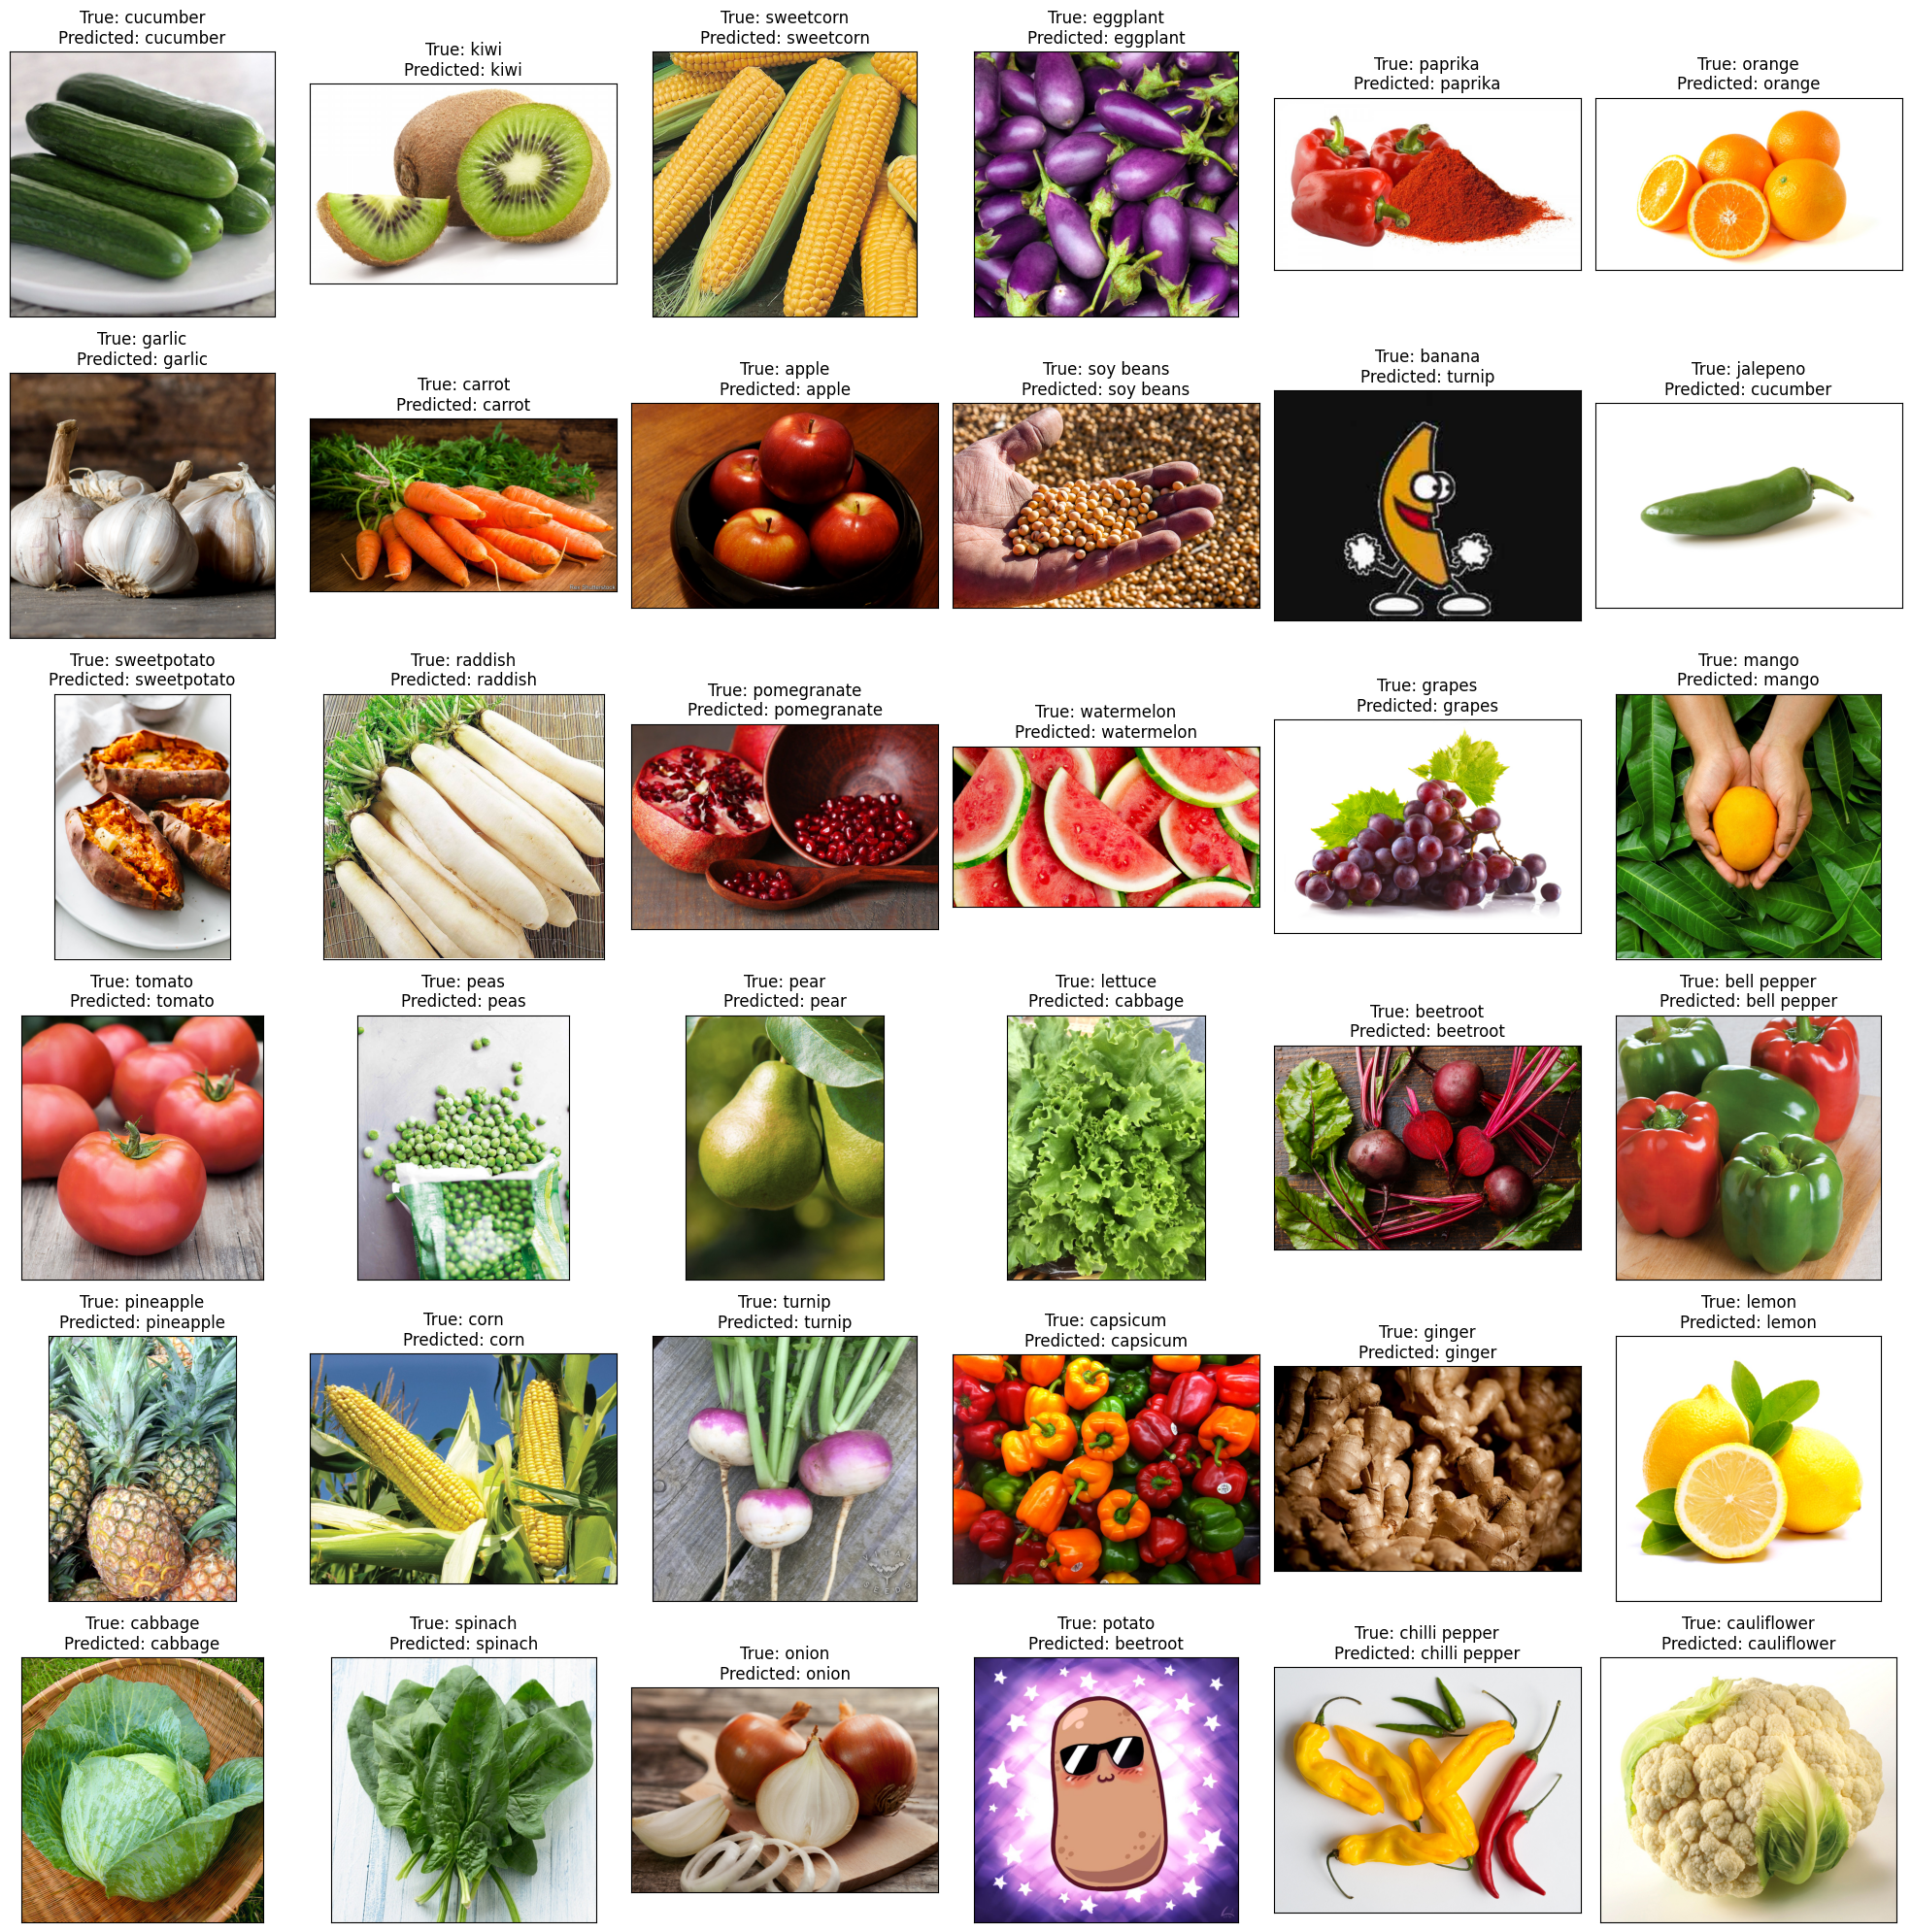

In [ ]:
from pathlib import Path
# Định nghĩa đường dẫn đến thư mục test
test_dir = Path('/content/drive/MyDrive/fruit_vegetables/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

# Hàm xử lý ảnh và tạo DataFrame
def proc_img(filepath):
    labels = [str(filepath[i]).split("/")[-2] for i in range(len(filepath))]
    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    df = pd.concat([filepath, labels], axis=1)
    df = df.sample(frac=1).reset_index(drop=True)
    return df

# Tạo DataFrame cho tập test
test_df = proc_img(test_filepaths)

# Lấy ra một hình ảnh từ mỗi class
df_unique = test_df.drop_duplicates(subset=["Label"]).reset_index()

# Dự đoán nhãn cho các hình ảnh đã chọn
pred = []
for filepath in df_unique.Filepath:
    image = tf.keras.preprocessing.image.load_img(filepath, target_size=(64, 64))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])#chuyển đổi một hình ảnh đơn lẻ thành một "batch" chứa một hình ảnh duy nhất
    predictions = cnn.predict(input_arr)
    pred.append(test_set.class_names[np.argmax(predictions)]) # truy cập vào tên lớp tương ứng với chỉ số và lấy ra chỉ số nhãn lớn nhất

# Hiển thị hình ảnh với nhãn thực và nhãn dự đoán
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath.iloc[i]))
    ax.set_title(f"True: {df_unique.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()


**Hiển thị Dự đoán trên Hình ảnh từ Tập dữ liệu Kiểm tra**

1/1 [==============================] - 0s 47ms/step


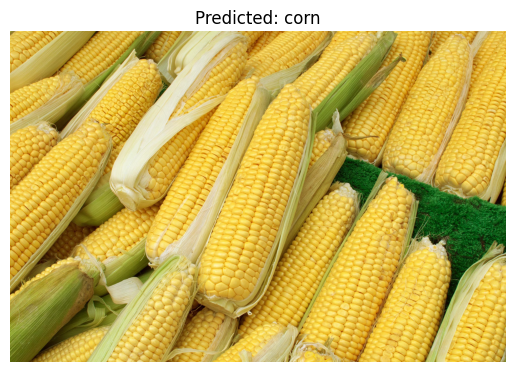

1/1 [==============================] - 0s 73ms/step


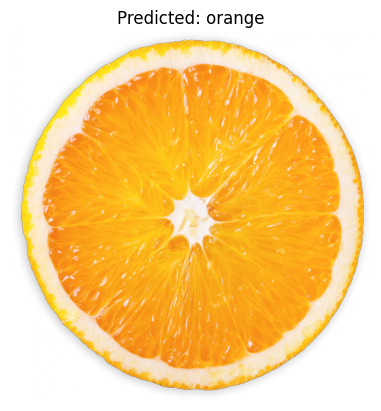

In [ ]:
# Lấy các class names từ tập test
class_names = test_set.class_names

# Hàm dự đoán và hiển thị kết quả
def predict_and_display(image_path, model, class_names):
    # Đọc và hiển thị hình ảnh
    image = load_img(image_path, target_size=(64, 64))
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)  # Chuyển đổi ảnh đơn lẻ thành 1 batch chứa 1 hình ảnh duy nhất
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]

    # Hiển thị hình ảnh với nhãn dự đoán
    img_display = plt.imread(image_path)
    plt.imshow(img_display)
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

# Ví dụ: Kiểm tra và hiển thị dự đoán cho một số hình ảnh từ tập test
test_image_paths = [
    '/content/drive/MyDrive/fruit_vegetables/test/corn/Image_1.jpg',
    '/content/drive/MyDrive/fruit_vegetables/test/orange/Image_10.png'
]

for image_path in test_image_paths:
    predict_and_display(image_path, cnn, class_names)



**Dự đoán trên 1 ảnh**

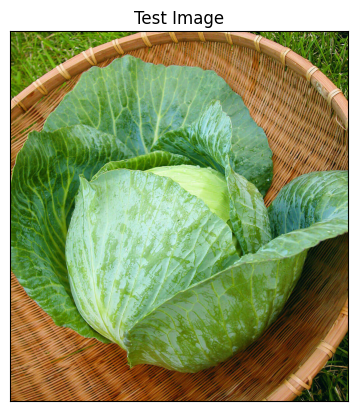

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/fruit_vegetables/test/cabbage/Image_10.jpg'
# đọc ảnh
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Hiển thị ảnh
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# testing model
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  #chuyển đổi một hình ảnh đơn lẻ thành một "batch" chứa một hình ảnh duy nhất
predictions = cnn.predict(input_arr)
print(predictions)

1/1 [==============================] - 0s 110ms/step
[[2.2026667e-09 1.0460985e-07 3.7740485e-15 8.4475755e-07 9.9911207e-01
  2.1617718e-07 1.2105212e-13 4.7984338e-07 3.1346378e-08 1.2970230e-07
  2.0078812e-06 9.4442294e-11 3.9245986e-08 5.1830561e-13 1.1206338e-05
  1.4276788e-04 3.2727330e-06 1.4978040e-07 1.6929870e-04 3.3963921e-08
  1.3168970e-12 1.0960551e-11 1.4962007e-09 1.9325326e-07 5.0590589e-04
  4.2436932e-06 1.3271830e-15 6.2543000e-12 5.7689565e-08 8.3971173e-07
  4.2193853e-05 1.6612679e-06 2.1059402e-13 5.1588161e-12 1.6518874e-09
  2.4358558e-06]]


In [ ]:

result_index = np.argmax(predictions) #Return index of max element
print(result_index)

4


In [ ]:
print(predictions[0])
print(max(predictions[0]))

[2.2026667e-09 1.0460985e-07 3.7740485e-15 8.4475755e-07 9.9911207e-01
 2.1617718e-07 1.2105212e-13 4.7984338e-07 3.1346378e-08 1.2970230e-07
 2.0078812e-06 9.4442294e-11 3.9245986e-08 5.1830561e-13 1.1206338e-05
 1.4276788e-04 3.2727330e-06 1.4978040e-07 1.6929870e-04 3.3963921e-08
 1.3168970e-12 1.0960551e-11 1.4962007e-09 1.9325326e-07 5.0590589e-04
 4.2436932e-06 1.3271830e-15 6.2543000e-12 5.7689565e-08 8.3971173e-07
 4.2193853e-05 1.6612679e-06 2.1059402e-13 5.1588161e-12 1.6518874e-09
 2.4358558e-06]
0.99911207


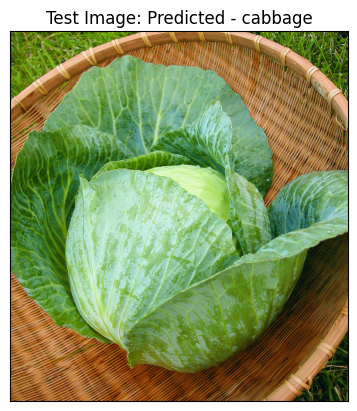

In [ ]:
# Displaying the image again with predicted label
plt.imshow(img)
plt.title(f'Test Image: Predicted - {test_set.class_names[result_index]}')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))


It's a cabbage


1/1 [==============================] - 0s 242ms/step


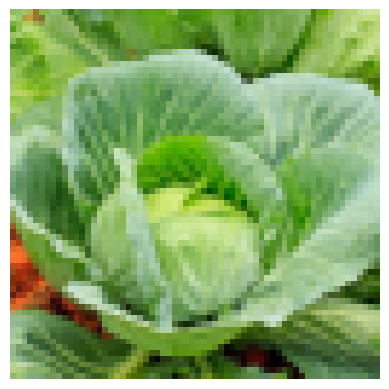

Loại : vegetables
Dự đoán : cabbage
Độ tin cậy dự đoán: 1.00


In [ ]:
import tensorflow as tf
import numpy as np
model= tf.keras.models.load_model('/content/drive/MyDrive/Models/trained_model.h5')
# Load Labels
with open("/content/drive/MyDrive/labels/labels.txt") as f:
    labels = f.read().splitlines()

# Labels for fruits and vegetables
fruits = ['banana', 'apple', 'pear', 'grapes', 'orange', 'kiwi', 'watermelon', 'pomegranate', 'pineapple', 'mango']
vegetables = ['cucumber', 'carrot', 'capsicum', 'onion', 'potato', 'lemon', 'tomato', 'raddish', 'beetroot', 'cabbage',
              'lettuce', 'spinach', 'soy bean', 'cauliflower', 'bell pepper', 'chilli pepper', 'turnip', 'corn',
              'sweetcorn', 'sweet potato', 'paprika', 'jalepeno', 'ginger', 'garlic', 'peas', 'eggplant']


from PIL import Image
import matplotlib.pyplot as plt

# Hàm xử lý ảnh và dự đoán
def process_and_predict_image(img_path):
    img = Image.open(img_path)
    img = img.resize((64, 64))  # Resize ảnh về kích thước
    input_arr = tf.keras.preprocessing.image.img_to_array(img)
    input_arr = np.array([input_arr])  # #chuyển đổi một hình ảnh đơn lẻ thành một "batch" chứa một hình ảnh duy nhất
    predictions = model.predict(input_arr) # Dự đoán nhãn cho ảnh
    predicted_index = np.argmax(predictions)# Lấy chỉ số của nhãn có giá trị dự đoán cao nhất
    confidence = predictions[0][predicted_index]  # Lấy độ tin cậy từ giá trị dự đoán
    return labels[predicted_index], confidence, img  # Trả về nhãn dự đoán, độ tin cậy và ảnh đã xử lý
# Ví dụ sử dụng hàm trên với một ảnh test
test_image_path = "/content/drive/MyDrive/fruit_vegetables/test/cabbage/Image_5.jpg"  # Đường dẫn đến hình ảnh cần dự đoán
result, confidence, img = process_and_predict_image(test_image_path)

# Hiển thị ảnh và kết quả dự đoán
plt.imshow(img)
plt.axis('off')  # Ẩn trục
plt.show()

if result in vegetables:
    print(f"Loại : vegetables")
else:
    print(f"Loại : fruit")

print(f"Dự đoán : {result}")
print(f"Độ tin cậy dự đoán: {confidence:.2f}")
